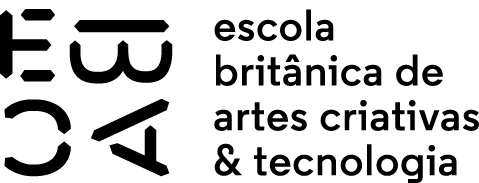


**Profissão**: Cientista de Dados

**Módulo 6 | Descritiva I | Exercício 3**

**Aluno:** Lucas Cirilo dos Santos
**Data:** 29 de Setembro de 2023.

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

Importando Bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
df_sinasc = pd.read_csv('sinasc_RO_2019.csv')
df_sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
df_sinasc['APGAR5'].isna().sum()

103

In [ ]:
df_sinasc.dropna(subset=['APGAR5'], inplace=True)

In [ ]:
df_sinasc['APGAR5'].isna().sum()

0

In [ ]:
df_sinasc.loc[(df_sinasc['APGAR5'] >= 0) &
              (df_sinasc['APGAR5'] <= 3),
'APGAR5_categorizado'] = 'asfixia grave'

df_sinasc.loc[(df_sinasc['APGAR5'] >= 4) &
              (df_sinasc['APGAR5'] <= 5),
'APGAR5_categorizado'] = 'asfixia moderada'

df_sinasc.loc[(df_sinasc['APGAR5'] >= 6) &
              (df_sinasc['APGAR5'] <= 7),
'APGAR5_categorizado'] = 'asfixia leve'

df_sinasc.loc[(df_sinasc['APGAR5'] >= 8) &
              (df_sinasc['APGAR5'] <= 10),
'APGAR5_categorizado'] = 'normal'

df_sinasc['APGAR5_categorizado'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: APGAR5_categorizado, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

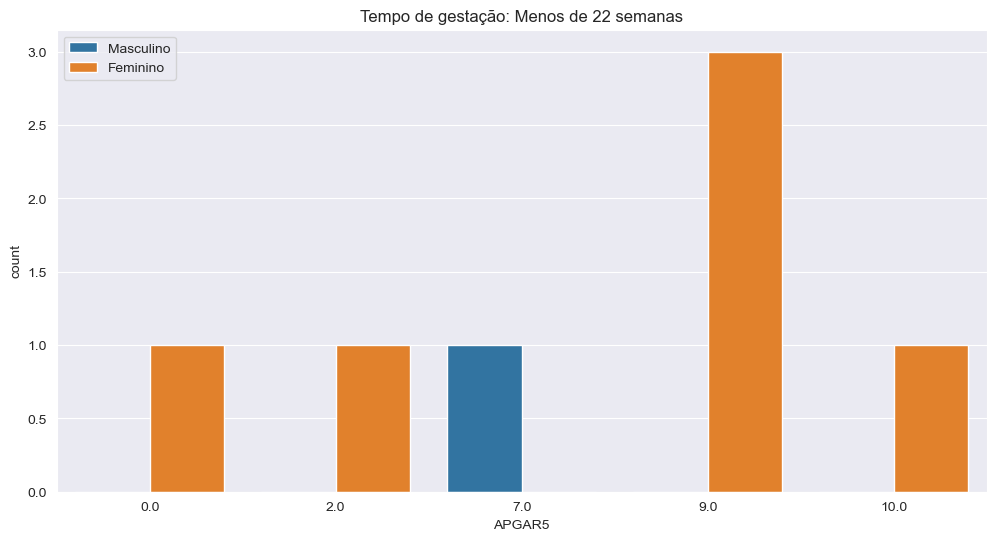

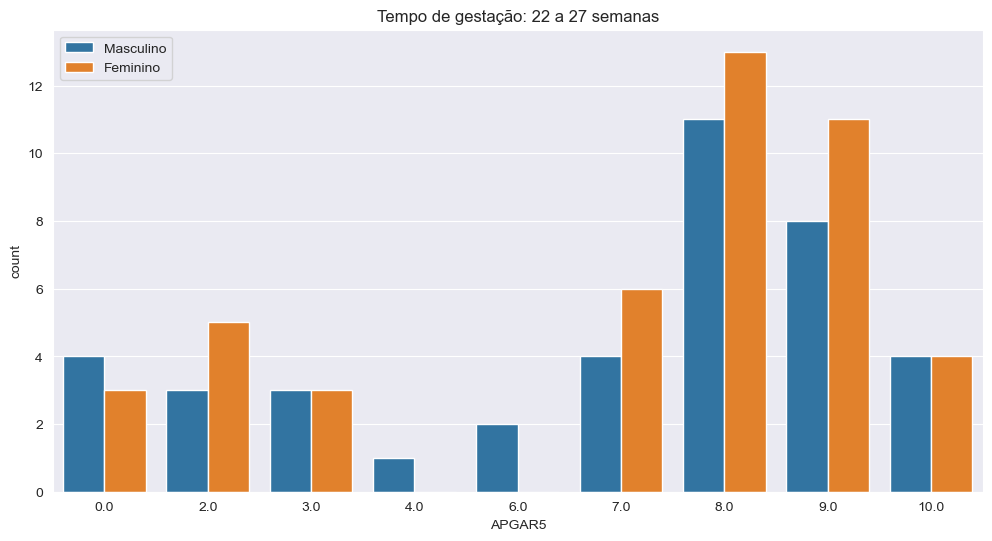

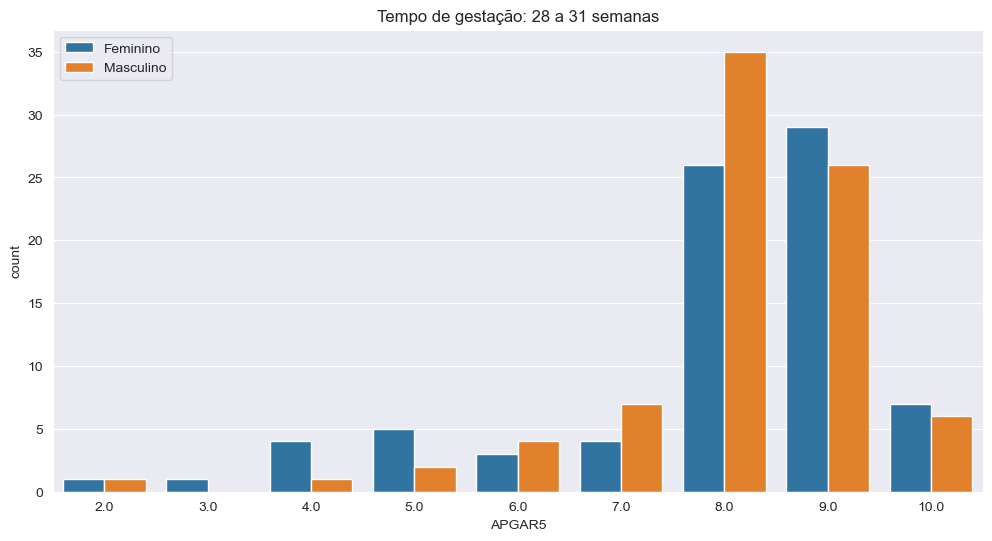

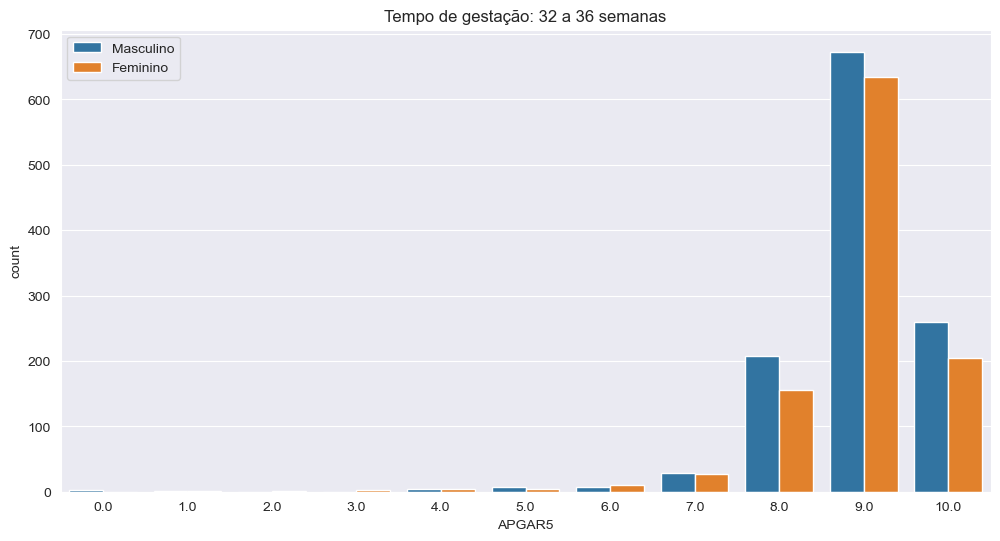

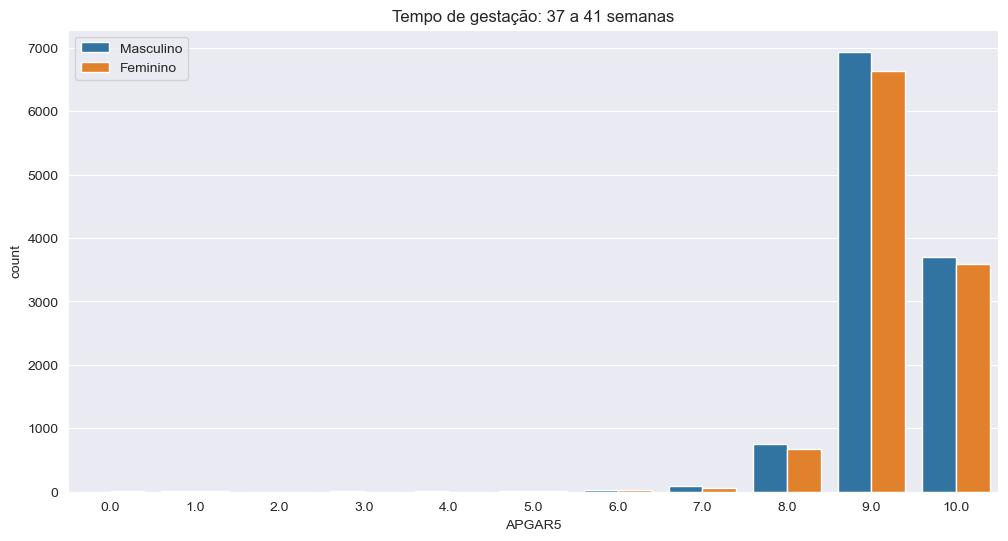

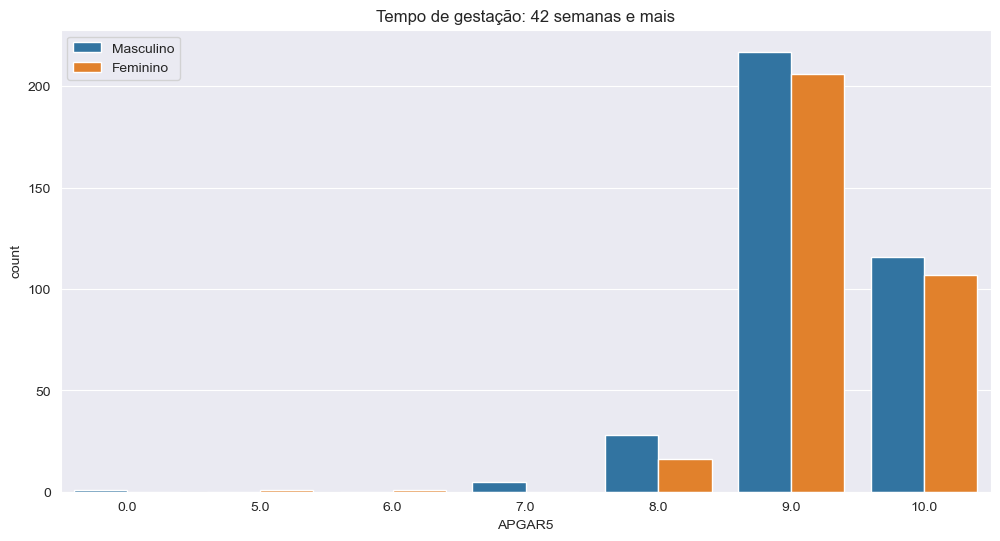

In [ ]:
tempo_gestacao = df_sinasc['GESTACAO'].value_counts().reindex(
    ['Menos de 22 semanas',
     '22 a 27 semanas',
     '28 a 31 semanas',
     '32 a 36 semanas',
     '37 a 41 semanas',
     '42 semanas e mais']).index

for gestacao in tempo_gestacao:
    sns.countplot(x='APGAR5',
                  hue='SEXO',
                  data=df_sinasc[df_sinasc.GESTACAO == gestacao])
    plt.legend(loc='upper left')
    plt.title(label='Tempo de gestação: {}'.format(gestacao))
    plt.show()

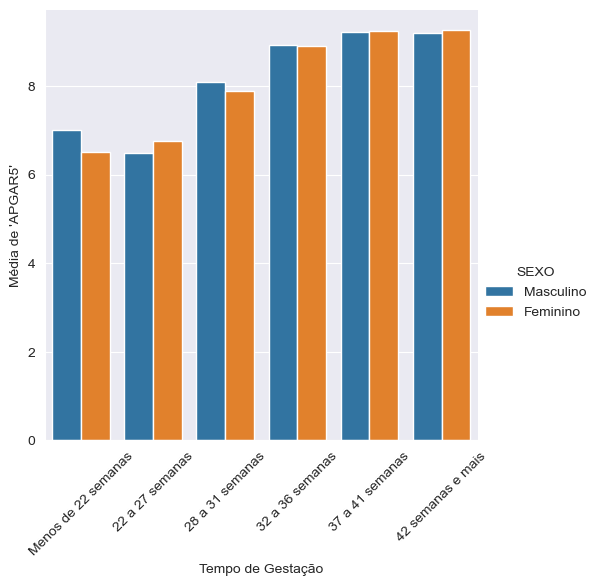

In [ ]:
sns.catplot(x='GESTACAO',
            y='APGAR5',
            hue='SEXO',
            data=df_sinasc,
            order=['Menos de 22 semanas',
                   '22 a 27 semanas',
                   '28 a 31 semanas',
                   '32 a 36 semanas',
                   '37 a 41 semanas',
                   '42 semanas e mais'],
            kind='bar',
            errorbar = None )
plt.xticks(rotation=45)

plt.ylabel(ylabel="Média de 'APGAR5'")
plt.xlabel(xlabel='Tempo de Gestação')

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [ ]:
tabela_cruzada = pd.crosstab(index=df_sinasc['GESTACAO'],
                             columns=df_sinasc['APGAR5_categorizado'])

tabela_cruzada = tabela_cruzada.reindex(
    index=['Menos de 22 semanas',
           '22 a 27 semanas',
           '28 a 31 semanas',
           '32 a 36 semanas',
           '37 a 41 semanas',
           '42 semanas e mais'],
    columns=['asfixia grave',
             'asfixia moderada',
             'asfixia leve',
             'normal'])

tabela_cruzada

APGAR5_categorizado,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
Menos de 22 semanas,2,0,1,4
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
percentual_tabela_cruzada = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)

print(percentual_tabela_cruzada.sum(axis=1))

percentual_tabela_cruzada

GESTACAO
Menos de 22 semanas    1.0
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
dtype: float64


APGAR5_categorizado,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
Menos de 22 semanas,0.285714,0.000000,0.142857,0.571429
22 a 27 semanas,0.247059,0.011765,0.141176,0.600000
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.003581,0.008505,0.032677,0.955237
37 a 41 semanas,0.001465,0.001243,0.008702,0.988589
42 semanas e mais,0.001433,0.001433,0.008596,0.988539


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

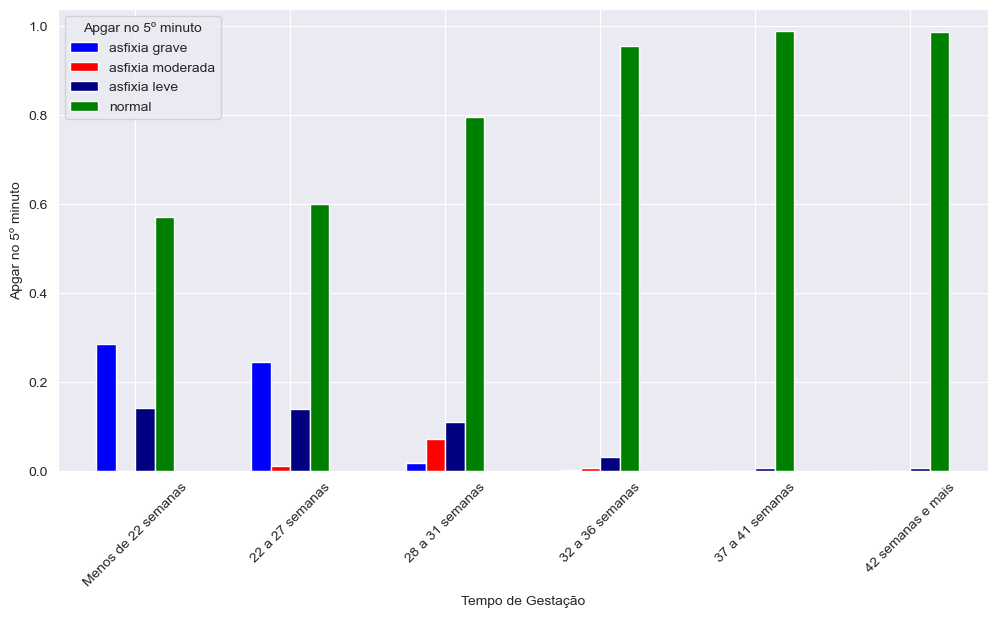

In [ ]:
plt.rc('figure', figsize=(12,6))

percentual_tabela_cruzada.plot.bar(color=['Blue',
                                          'red',
                                          'navy',
                                          'Green'])

plt.xticks(rotation=45)

plt.legend(title='Apgar no 5º minuto')
plt.ylabel(ylabel='Apgar no 5º minuto')
plt.xlabel(xlabel='Tempo de Gestação')

plt.show()

#### Insights

Ao observar os dados presente na base, percebe-se que à partir da 37 a 41 semanas, tem se o apgar5 maior que 08. O que indica que o bebê não sofreu asfixia. Em contrapartida, quanto mais baixo se torna o tempo de gestação, mais o bebê apresenta sofrimento respiratório, ou seja sofre uma maior asfixia. Indicando, que a adaptação a vida fora do útero está mais difícil para ele.
Vale destacar que bebês prematuros, incluindo aqueles com menos de 22 semanas de gestação, podem obter boas pontuações no teste de Apgar, inclusive com a pontuação 'normal' superando a quantidade de pontuações inferiores consideradas de risco. Porém, também pode se observar que nessa mesma quantidade de tempo existe um maior número de casos de bebês que apresentaram asfixia grave.


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<module 'seaborn' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

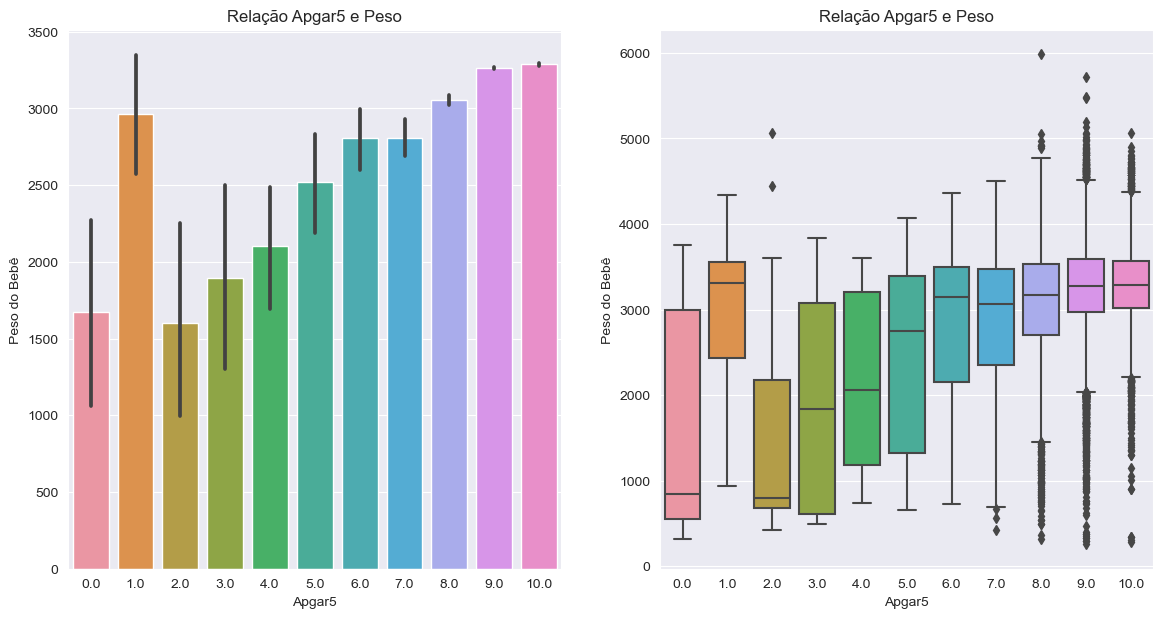

In [ ]:
plt.rc('figure', figsize = (14,7))
fix, axes = plt.subplots(1,2)

sns.barplot(x = 'APGAR5',
            y = 'PESO',
            data = df_sinasc,
            ax = axes[0],
            )



axes[0].set_title(label = 'Relação Apgar5 e Peso')

axes[0].set_ylabel(ylabel = 'Peso do Bebê')
axes[0].set_xlabel(xlabel ='Apgar5')

sns.boxplot(data = df_sinasc,
            x = 'APGAR5',
            y ='PESO')

axes[1].set_title(label = 'Relação Apgar5 e Peso')
axes[1].set_ylabel(ylabel = 'Peso do Bebê')
axes[1].set_xlabel(xlabel = 'Apgar5')
sns

#### Insights

Ao correlacionar o peso e o apgar dos 5 primeiros minutos de vida do bebê fora do útero, e ao descarta um possível erro de dado ou uma situação atípica. Onde mesmo com apgar baixo, o bebê teve um peso acima da média. Fica evidente, que quanto maior o apgar, menor a variação de peso.
